# Overview of PyLandStats

In [ ]:
import swisslandstats as sls
from shapely.geometry import Point

import pylandstats as pls

Running the cell below is required so that the land use/land cover (LULC) data is downloaded and preprocessed (see [A03-swisslandstats-preprocessing.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/master/notebooks/A03-swisslandstats-preprocessing.ipynb) for more details).

In [ ]:
!make -C .. lulc_rasters

## Landscape analysis

We can load landscapes from raster files and compute pandas data frames of patch, class and landscape level. See the notebook [01-landscape-analysis.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/master/notebooks/01-landscape-analysis.ipynb) for more thorough demonstration.

In [ ]:
URBAN_CLASS_VAL = 1
input_filepath = "../data/processed/veveyse-AS18_4.tif"

<AxesSubplot:>

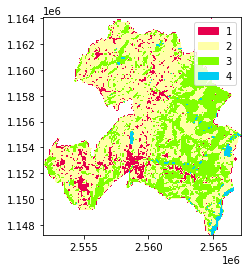

In [ ]:
ls = pls.Landscape(input_filepath)
ls.plot_landscape(cmap=sls.noas04_4_cmap, legend=True)

In [ ]:
patch_metrics_df = ls.compute_patch_metrics_df()
patch_metrics_df.head()

,class_val,area,perimeter,perimeter_area_ratio,shape_index,fractal_dimension,euclidean_nearest_neighbor
patch_id,,,,,,,
0,1,1.0,400.0,400.0,1.0,1.0,360.555128
1,1,1.0,400.0,400.0,1.0,1.0,360.555128
2,1,1.0,400.0,400.0,1.0,1.0,200.000000
3,1,1.0,400.0,400.0,1.0,1.0,200.000000
4,1,1.0,400.0,400.0,1.0,1.0,424.264069


In [ ]:
class_metrics_df = ls.compute_class_metrics_df()
class_metrics_df

,total_area,proportion_of_landscape,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,effective_mesh_size,area_mn,...,fractal_dimension_md,fractal_dimension_ra,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv
class_val,,,,,,,,,,,,,,,,,,,,,
1,1041.0,7.749572,287,2.136529,1.421872,256600.0,19.102211,19.969231,3.877838,3.627178,...,1.000000,0.220343,0.045077,4.402981,309.244705,240.805397,223.606798,1100.000000,168.551251,54.504167
2,7559.0,56.271868,60,0.446661,44.807563,679700.0,50.599270,20.810345,2737.138614,125.983333,...,1.053496,0.311892,0.066308,6.247750,229.079970,203.046531,200.000000,624.621125,86.731582,37.860832
3,4560.0,33.946252,243,1.808978,23.040274,512700.0,38.167200,20.433824,720.249237,18.765432,...,1.000000,0.284597,0.051072,4.945558,253.299859,209.633359,223.606798,521.110255,77.749231,30.694542
4,273.0,2.032308,75,0.558327,0.528549,50000.0,3.722177,8.500000,0.619147,3.640000,...,1.000000,0.149061,0.032689,3.205601,552.835154,485.539111,360.555128,3124.154028,491.229708,88.856453


In [ ]:
landscape_metrics_df = ls.compute_landscape_metrics_df()
landscape_metrics_df

/home/martibosch/libraries/pylandstats/pylandstats/landscape.py:684: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  return self._adjacency_df.sum(level=[1]).loc[self.classes, self.classes]


,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,effective_mesh_size,entropy,shannon_diversity_index,...,fractal_dimension_md,fractal_dimension_ra,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv
0,13433.0,665,4.950495,44.807563,749500.0,55.795429,18.273707,3461.884836,1.391901,0.964792,...,1.0,0.311892,0.049667,4.822265,309.0414,213.949783,223.606798,3124.154028,225.342246,72.916524


## Spatio-temporal analysis

Given a temporally-ordered sequence of landscape snapshots, we can also analyze the spatio-temporal patterns of landscape change. To that end, PyLandStats can compute pandas dataframes with the evolution of the metrics and plot them, both at the class and landscape level. See the notebook [02-spatiotemporal-analysis.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/master/notebooks/02-spatiotemporal-analysis.ipynb) for a more thorough demonstration.

<a id='spatiotemporal-analysis'></a>

In [ ]:
input_filepaths = [
    "../data/processed/veveyse-AS97R_4.tif",
    "../data/processed/veveyse-AS09R_4.tif",
    "../data/processed/veveyse-AS18_4.tif",
]
years = [1992, 2004, 2012]

In [ ]:
sta = pls.SpatioTemporalAnalysis(input_filepaths, dates=years)

In [ ]:
sta.compute_class_metrics_df()

metric           total_area  proportion_of_landscape  number_of_patches  \
class_val dates                                                           
1         1992        794.0                 5.910817              309.0   
          2004        906.0                 6.744584              304.0   
          2012       1041.0                 7.749572              287.0   
2         1992       7805.0                58.103179               54.0   
          2004       7692.0                57.261967               54.0   
          2012       7559.0                56.271868               60.0   
3         1992       4529.0                33.715477              228.0   
          2004       4553.0                33.894141              245.0   
          2012       4560.0                33.946252              243.0   
4         1992        305.0                 2.270528               96.0   
          2004        282.0                 2.099308               86.0   
          2012        273.0                 2.032308               75.0   

metric           patch_density  largest_patch_index  total_edge  edge_density  \
class_val dates                                                                 
1         1992        2.300305             0.602993    227800.0     16.958237   
          2004        2.263083             0.699769    242000.0     18.015335   
          2012        2.136529             1.421872    256600.0     19.102211   
2         1992        0.401995            46.460210    661200.0     49.222065   
          2004        0.401995            45.723219    671500.0     49.988833   
          2012        0.446661            44.807563    679700.0     50.599270   
3         1992        1.697313            23.003052    515000.0     38.338420   
          2004        1.823867            23.055163    514300.0     38.286310   
          2012        1.808978            23.040274    512700.0     38.167200   
4         1992        0.714658             0.550882     57600.0      4.287948   
          2004        0.640214             0.521105     51600.0      3.841286   
          2012        0.558327             0.528549     50000.0      3.722177   

metric           landscape_shape_index  effective_mesh_size     area_mn  ...  \
class_val dates                                                          ...   
1         1992               20.210526             0.994566    2.569579  ...   
          2004               20.065574             1.482617    2.980263  ...   
          2012               19.969231             3.877838    3.627178  ...   
2         1992               19.943503          2950.532197  144.537037  ...   
          2004               20.346591          2851.566292  142.444444  ...   
          2012               20.810345          2737.138614  125.983333  ...   
3         1992               20.614815           717.904042   19.864035  ...   
          2004               20.592593           721.077124   18.583673  ...   
          2012               20.433824           720.249237   18.765432  ...   
4         1992                9.571429             0.671108    3.177083  ...   
          2004                8.941176             0.613861    3.279070  ...   
          2012                8.500000             0.619147    3.640000  ...   

metric           fractal_dimension_md  fractal_dimension_ra  \
class_val dates                                               
1         1992               1.000000              0.197592   
          2004               1.000000              0.206568   
          2012               1.000000              0.220343   
2         1992               1.027906              0.306079   
          2004               1.037246              0.309307   
          2012               1.053496              0.311892   
3         1992               1.000000              0.286318   
          2004               1.000000              0.284906   
          2012               1.000000              0.284597   


In [ ]:
sta.compute_landscape_metrics_df()

/home/martibosch/libraries/pylandstats/pylandstats/landscape.py:684: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  return self._adjacency_df.sum(level=[1]).loc[self.classes, self.classes]


metric,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,effective_mesh_size,entropy,shannon_diversity_index,...,fractal_dimension_md,fractal_dimension_ra,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv
dates,,,,,,,,,,,,,,,,,,,,,
1992,13433.0,687.0,5.114271,46.460210,730800.0,54.403335,17.870690,3670.101913,1.343467,0.931221,...,1.0,0.306079,0.048155,4.684560,308.379611,212.349764,223.606798,3124.154028,219.194252,71.079359
2004,13433.0,689.0,5.129160,45.723219,739700.0,55.065883,18.062500,3574.739894,1.363540,0.945134,...,1.0,0.309307,0.048268,4.693809,309.626880,211.870371,223.606798,3124.154028,227.583997,73.502661
2012,13433.0,665.0,4.950495,44.807563,749500.0,55.795429,18.273707,3461.884836,1.391901,0.964792,...,1.0,0.311892,0.049667,4.822265,309.041400,213.949783,223.606798,3124.154028,225.342246,72.916524


We can also plot the time series of metrics at the class level, e.g., the evolution of the proportion of landscape occupied by the land use class value `1` (urban):

<AxesSubplot:ylabel='PLAND'>

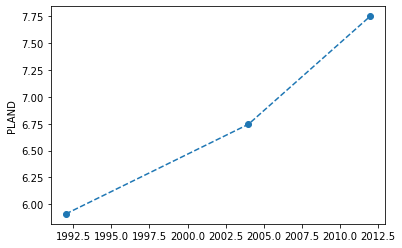

In [ ]:
sta.plot_metric("proportion_of_landscape", class_val=URBAN_CLASS_VAL)

or we can also plot at the landscape level by not providing any `class_val` argument, e.g., the evolution of the area-weighted mean fractal dimension of all the patches of the landscape:

<AxesSubplot:ylabel='FRAC_AM'>

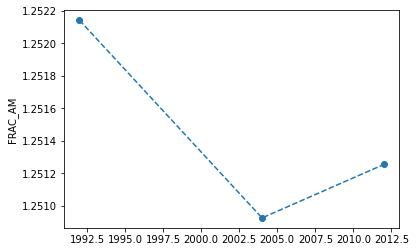

In [ ]:
sta.plot_metric("fractal_dimension_am")

## Zonal analysis

Zonal analysis is a common procedure to compute statistics for a set of specified spatial zones. PyLandStats features two classes to perform zonal analysis, `ZonalAnalysis` and `BufferAnalysis`. The former allows the user to fully customize how the spatial extent (zones) are defined, while the latter will define the spatial extents by adding buffers around a feature of interest.

In fact, `BufferAnalysis` might be used to perform the "gradient analysis" approach from landscape ecology, which consists in evaluating the spatial variation of the landscape patterns as one moves progressively from the highly-developed urban cores to the less intense suburbs until the rural and natural hinterlands. See the notebook [03-zonal-analysis.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/master/notebooks/03-zonal-analysis.ipynb) for a more thorough demonstration.

<a id='zonal-analysis'></a>

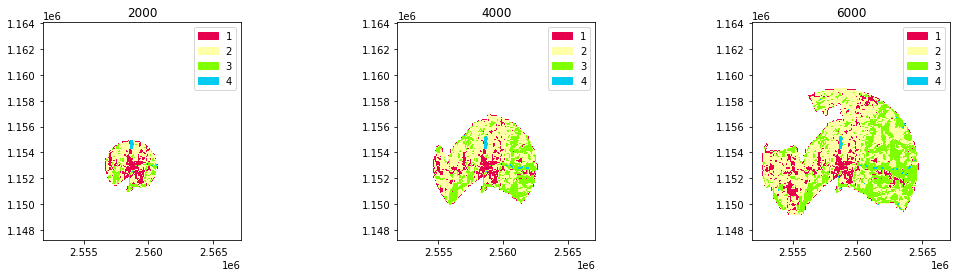

In [ ]:
# latitude and longitude of the center of Chatel-St-Denis according to OpenStreetMap
base_mask = Point(6.8992073, 46.52634)
base_mask_crs = "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"

# buffer distances (in meters)
buffer_dists = [2000, 4000, 6000]

# initialize a `BufferAnalysis` instance
ba = pls.BufferAnalysis(
    input_filepath, base_mask, buffer_dists, base_mask_crs=base_mask_crs
)

# plot the landscape
fig = ba.plot_landscapes(cmap=sls.noas04_4_cmap)

In [ ]:
ba.compute_class_metrics_df()

metric                  total_area  proportion_of_landscape  \
class_val buffer_dists                                        
1         2000               281.0                24.224138   
          4000               469.0                12.727273   
          6000               785.0                10.910354   
2         2000               664.0                57.241379   
          4000              2090.0                56.716418   
          6000              4042.0                56.177901   
3         2000               193.0                16.637931   
          4000              1088.0                29.525102   
          6000              2303.0                32.008339   
4         2000                22.0                 1.896552   
          4000                38.0                 1.031208   
          6000                65.0                 0.903405   

metric                  number_of_patches  patch_density  largest_patch_index  \
class_val buffer_dists                                                          
1         2000                       25.0       2.155172            16.465517   
          4000                       75.0       2.035278             5.183175   
          6000                      158.0       2.195969             2.654621   
2         2000                       11.0       0.948276            43.793103   
          4000                       24.0       0.651289            45.210312   
          6000                       42.0       0.583739            46.309937   
3         2000                       41.0       3.534483             3.965517   
          4000                       89.0       2.415197            10.719132   
          6000                      143.0       1.987491            20.625434   
4         2000                        7.0       0.603448             1.379310   
          4000                       11.0       0.298507             0.624152   
          6000                       32.0       0.444753             0.319666   

metric                  total_edge  edge_density  landscape_shape_index  \
class_val buffer_dists                                                    
1         2000             50900.0     43.879310               7.647059   
          4000             97700.0     26.512890              11.522727   
          6000            170300.0     23.669215              15.210526   
2         2000             76000.0     65.517241               8.365385   
          4000            213100.0     57.829037              12.489130   
          6000            394500.0     54.829743              16.492188   
3         2000             38700.0     33.362069               7.892857   
          4000            151300.0     41.058345              12.818182   
          6000            293500.0     40.792217              16.916667   
4         2000              3800.0      3.275862               2.200000   
          4000              7700.0      2.089552               3.153846   
          6000             16900.0      2.348853               5.411765   

metric                  effective_mesh_size    area_mn  ...  \
class_val buffer_dists                                  ...   
1         2000                    32.356034  11.240000  ...   
          4000                    11.015197   6.253333  ...   
          6000                     6.971369   4.968354  ...   
2         2000                   228.406897  60.363636  ...   
          4000                   764.736499  87.083333  ...   
          6000                  1559.026824  96.238095  ...   
3         2000                     3.295690   4.707317  ...   
          4000                    60.189417  12.224719  ...   
          6000                   314.360111  16.104895  ...   
4         2000                     0.225862   3.142857  ...   
          4000                     0.151967   3.454545  ...   
          6000                     0.083530   2.031250  ...   

metric                  fractal_dimension_md  fr

In [ ]:
ba.compute_landscape_metrics_df()

/home/martibosch/libraries/pylandstats/pylandstats/landscape.py:684: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  return self._adjacency_df.sum(level=[1]).loc[self.classes, self.classes]


metric,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,effective_mesh_size,entropy,shannon_diversity_index,...,fractal_dimension_md,fractal_dimension_ra,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv
buffer_dists,,,,,,,,,,,,,,,,,,,,,
2000,1160.0,84.0,7.241379,43.793103,84700.0,73.017241,7.456522,264.284483,1.491411,1.033768,...,1.011893,0.240666,0.056555,5.426635,287.084656,223.273661,200.000000,1134.166406,174.810156,60.891501
4000,3685.0,199.0,5.400271,45.210312,234900.0,63.744912,11.217213,836.093080,1.427391,0.989392,...,1.011893,0.273152,0.056090,5.391409,282.040810,215.340678,223.606798,1412.451550,181.564161,64.375138
6000,7195.0,375.0,5.211953,46.309937,437600.0,60.820014,14.741176,1880.441835,1.401519,0.971459,...,1.000000,0.297394,0.051537,4.989308,300.324053,212.497311,223.606798,1643.908891,217.605445,72.456882


Analogously to the spatio-temporal analysis, we can use the `plot_metric` method to plot how the computed metrics respond to increasing buffer distances, e.g., how the proportion of landscape occupied by the land use class value `1` (urban) as we increase the buffer distance

<AxesSubplot:ylabel='PLAND'>

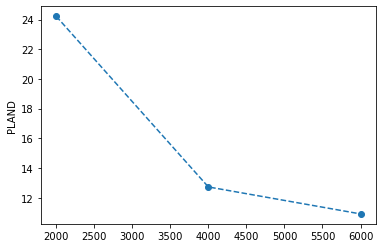

In [ ]:
ba.plot_metric("proportion_of_landscape", class_val=URBAN_CLASS_VAL)

Like in the spatio-temporal analysis, the plots at the landscape level can obtained by not providing any `class_val` argument.

## Spatio-temporal buffer analysis

Landscape metrics are very sensitive to the spatial extent of the considered map. Therefore, we might also want to evaluate how the computed time series of metrics responds to changes in the map extent. This is why PyLandStats features an additional `SpatioTemporalBufferAnalysis` analysis class. See the notebook [04-spatiotemporal-buffer-analysis.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/master/notebooks/04-spatiotemporal-buffer-analysis.ipynb) for a more thorough demonstration.

Let us take the sequence of landscapes `input_filepaths` from [the spatio-temporal analysis above](#spatiotemporal-analysis) and let us use again the `dates` argument to specify the dates that correspond to each landscape.
Let us also take the latitude and longitude of the center of Lausanne as well as the buffer distances defined in [the zonal analysis above](#zonal-analysis). Now we can construct our `SpatioTemporalBufferAnalysis` instance and evaluate the sensitive of our spatio-temporal analysis to the extent of the map:

In [ ]:
stba = pls.SpatioTemporalBufferAnalysis(
    input_filepaths,
    base_mask,
    buffer_dists,
    base_mask_crs=base_mask_crs,
    dates=years,
)

In [ ]:
stba.compute_class_metrics_df()

metric                      total_area proportion_of_landscape  \
buffer_dist class_val dates                                      
2000        1         1992       205.0               17.672414   
                      2004       245.0                21.12069   
                      2012       281.0               24.224138   
            2         1992       741.0                63.87931   
                      2004       698.0               60.172414   
                      2012       664.0               57.241379   
            3         1992       194.0               16.724138   
                      2004       193.0               16.637931   
                      2012       193.0               16.637931   
            4         1992        20.0                1.724138   
                      2004        24.0                2.068966   
                      2012        22.0                1.896552   
4000        1         1992       336.0                9.118046   
                      2004       402.0               10.909091   
                      2012       469.0               12.727273   
            2         1992      2215.0               60.108548   
                      2004      2149.0               58.317503   
                      2012      2090.0               56.716418   
            3         1992      1093.0               29.660787   
                      2004      1092.0                29.63365   
                      2012      1088.0               29.525102   
            4         1992        41.0                1.112619   
                      2004        42.0                1.139756   
                      2012        38.0                1.031208   
6000        1         1992       591.0                8.214038   
                      2004       682.0                9.478805   
                      2012       785.0               10.910354   
            2         1992      4221.0                58.66574   
                      2004      4136.0               57.484364   
                      2012      4042.0               56.177901   
            3         1992      2313.0               32.147325   
                      2004      2308.0               32.077832   
                      2012      2303.0               32.008339   
            4         1992        70.0                0.972898   
                      2004        69.0                0.958999   
                      2012        65.0                0.903405   

metric                      number_of_patches patch_density  \
buffer_dist class_val dates                                   
2000        1         1992               38.0      3.275862   
                      2004               34.0      2.931034   
                      2012               25.0      2.155172   
            2         1992                7.0      0.603448   
                      2004                7.0      0.603448   
                      2012               11.0      0.948276   
            3         1992               42.0       3.62069   
                      2004               43.0      3.706897   
                      2012               41.0      3.534483   
            4         1992                7.0      0.603448   
                      2004                9.0      0.775862   
                      2012                7.0      0.603448   
4000        1         1992               97.0      2.632293   
                      2004               88.0       2.38806   
                      2012               75.0      2.035278   
            2         1992               20.0      0.542741   
                      2004               19.0      0.515604   
                      2012               24.0      0.651289   
            3         1992               86.0      2.333786   
                      2004               90.0      2.442334   
                      2012               89.0      2.415197   
            4         1992               1

<AxesSubplot:ylabel='PLAND'>

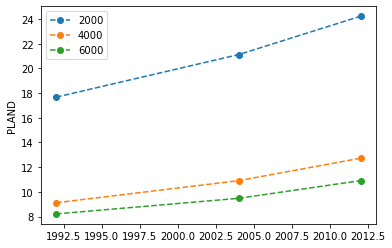

In [ ]:
stba.plot_metric("proportion_of_landscape", class_val=URBAN_CLASS_VAL)